<a href="https://colab.research.google.com/github/jancyrillmendoza/IBM-Data-Analysis/blob/main/_IBM_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from copy import deepcopy

In [4]:
path = '/content/drive/Shareddrives/MSDS 501 Group 1 /dataset/'
hr = path + 'WA_Fn-UseC_-HR-Employee-Attrition.csv'

In [5]:
RAW = pd.read_csv(hr)

In [6]:
RAW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
RAW.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
RAW.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [9]:
def get_categoricals(dataframe):
  colnames = []
  for col in dataframe:
    dt = dataframe[col].dtype
    if(dt == 'object'):
      colnames.append(col)
  return colnames

In [10]:
categoricals = get_categoricals(RAW)
non_categoricals = RAW.drop(columns=categoricals)

## Plot Non-Categorical Features

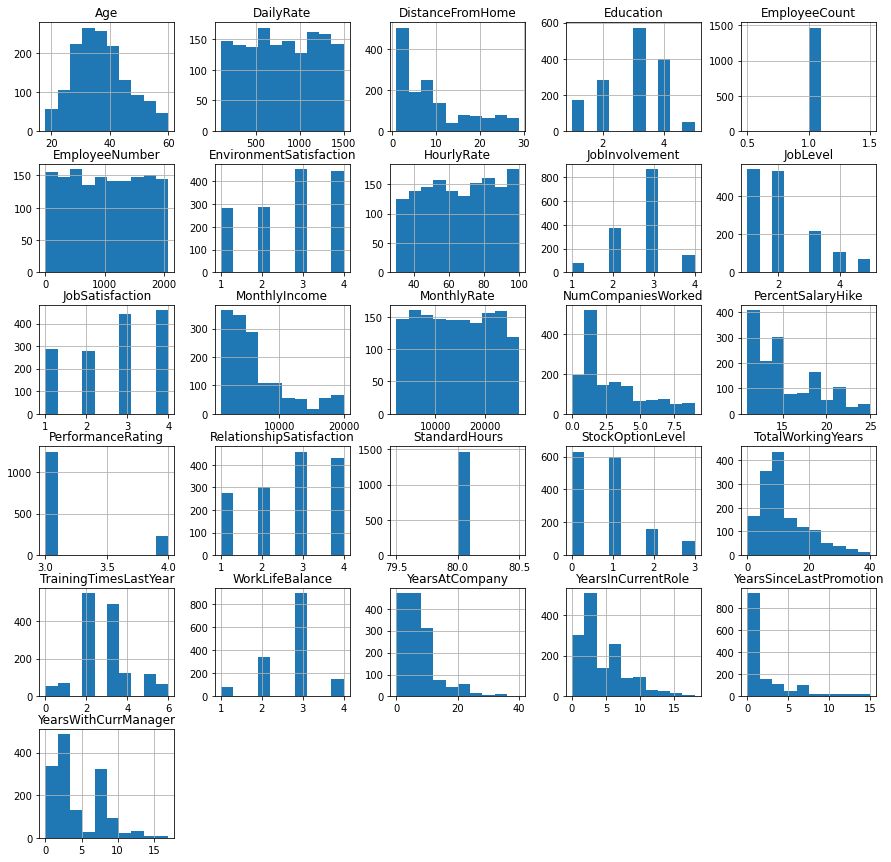

In [11]:
non_categoricals.hist(figsize=(15,15))
plt.show()

## Plot Categorical Features

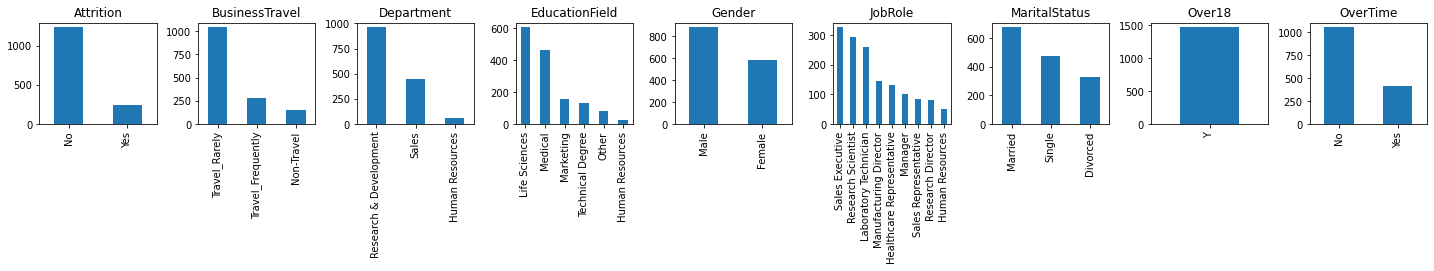

In [12]:
fig, ax = plt.subplots(1, len(categoricals), figsize=(20,2))
fig.tight_layout() 
for i, feature in enumerate(RAW[categoricals]):
    RAW[feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(feature)
fig.show()

## View Target Correlations

In [13]:
# Find correlations with the target and sort
data = deepcopy(RAW)
data['Target'] = data['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
data = data.drop(['Attrition'], axis=1)

correlations = data.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(4))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 DistanceFromHome    0.077924
Target              1.000000
EmployeeCount            NaN
StandardHours            NaN
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


## Encode Categorical Feaures

In [14]:
def encode(dataframe):
  d = deepcopy(dataframe)
  for col in dataframe:
    dt = dataframe[col].dtype
    if(dt == 'object'):
      print('encoded:', col)
      # get all unique vals
      unique = d[col].unique()
      codes = {}
      for i, v in enumerate(unique):
        codes[v] = i
      d[col] = d[col].apply(lambda x: codes[x])
  return d

In [15]:
encoded_data = encode(data)
encoded_data.head()

encoded: BusinessTravel
encoded: Department
encoded: EducationField
encoded: Gender
encoded: JobRole
encoded: MaritalStatus
encoded: Over18
encoded: OverTime


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Target
0,41,0,1102,0,1,2,0,1,1,2,...,80,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,0,1,2,3,...,80,1,10,3,3,10,7,1,7,0
2,37,0,1373,1,2,2,1,1,4,4,...,80,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,0,1,5,4,...,80,0,8,3,3,8,7,3,0,0
4,27,0,591,1,2,1,2,1,7,1,...,80,1,6,3,3,2,2,2,2,0


## Remove Outliers

In [16]:
def Winsorization_outliers(colname, df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    out = []
    for i in df:
        if (i > q3 or i < q1) and i>0:
            out.append(i)
    if(len(out) != 0):
      print(colname,'outliers:', len(out))
    return out

def remove_outliers(df):
    for col in df.columns[1:]:
        if df[col].dtype != 'object':
            data_filter = Winsorization_outliers(col, df[col])
            df = df[~df[col].isin(data_filter)]
    return df

cleaned_data = remove_outliers(encoded_data)

DailyRate outliers: 26
EmployeeNumber outliers: 30
MonthlyIncome outliers: 30
MonthlyRate outliers: 28
TotalWorkingYears outliers: 14
YearsAtCompany outliers: 12
YearsInCurrentRole outliers: 11
YearsSinceLastPromotion outliers: 13
YearsWithCurrManager outliers: 9


## View Correlations

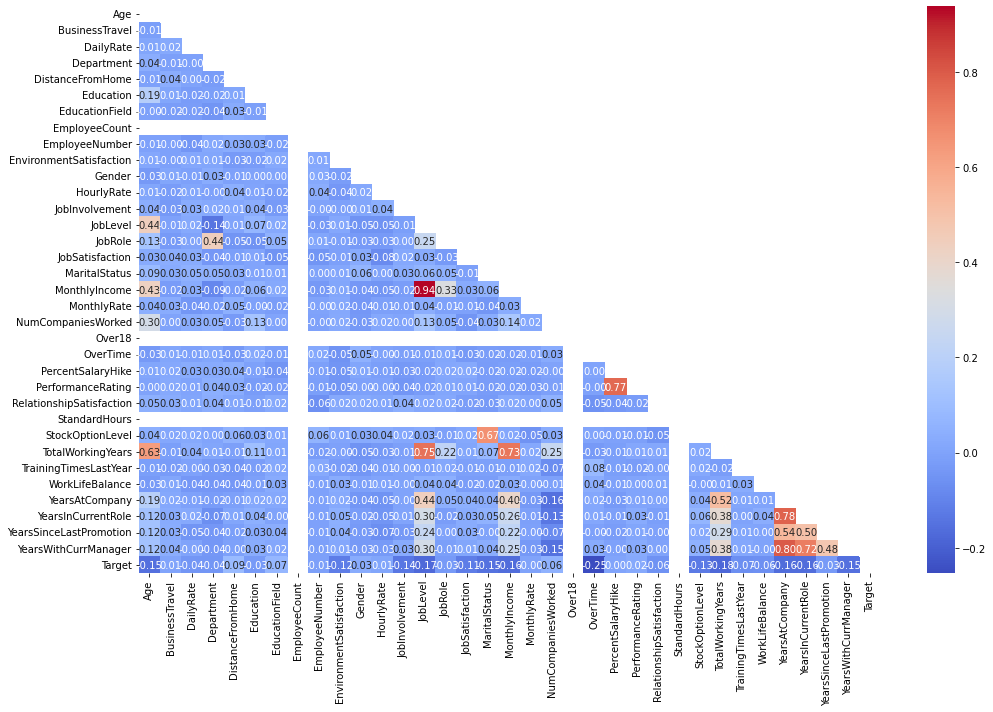

In [17]:
# Calculate correlations
corr = cleaned_data.corr()
plt.figure(figsize=(15, 10))
mask = np.triu(corr)
#for col in corr.columns:
#  corr.loc[corr[col] < 0.5, col] = 0
sns.heatmap(corr, annot = True, fmt = '.2f', mask = mask, cmap='coolwarm')
plt.tight_layout()

## Get X, y

In [18]:
y = cleaned_data['Target']
X = cleaned_data.drop(columns = ['Target'])

## Rescale (StandardScaler)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in X:
    X[col] = X[col].astype(float)
    X[[col]] = scaler.fit_transform(X[[col]])
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
16,-0.497061,-0.590288,-1.189998,0.504031,-0.508000,-0.882055,-1.027217,0.0,-1.704016,-1.588561,...,1.205180,0.0,1.380725,-0.516623,1.699557,-1.073924,-0.068732,-0.594983,-0.705949,0.342574
17,-1.633277,2.423901,0.801798,0.504031,0.860511,-0.882055,0.372258,0.0,-1.702314,1.173321,...,-0.647954,0.0,1.380725,-1.418655,-0.632240,-1.073924,-1.086381,-1.199047,-0.705949,-1.189560
18,1.888991,-0.590288,1.044146,-1.390832,-0.881230,1.073544,-1.027217,0.0,-1.700611,-1.588561,...,0.278613,0.0,-0.929985,3.091506,0.145026,0.343044,3.798332,1.217211,0.415671,0.955428
19,0.184668,-0.590288,-1.096593,0.504031,-0.881230,0.095744,-1.027217,0.0,-1.698908,1.173321,...,0.278613,0.0,-0.929985,-0.666961,0.145026,0.343044,-0.679322,-0.594983,-0.332075,-0.576706
20,-1.406034,2.423901,-0.334207,0.504031,0.238461,-0.882055,-0.327479,0.0,-1.695503,-1.588561,...,1.205180,0.0,0.225370,-0.817300,1.699557,-1.073924,-0.475792,-0.594983,-0.332075,-0.270279


# Oversampling and Undersampling

In [20]:
%%capture
%%bash
pip install imbalanced-learn

In [21]:
from collections import Counter

from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
from imblearn.combine import SMOTEENN, SMOTETomek

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

## Undersample Majority class

In [22]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X,y,test_size=0.25)

# summarize class distribution
print("Before undersampling: ", Counter(y_train_under))

# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train_under, y_train_under)

undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train_under, y_train_under)

# summarize class distribution
print("After undersampling: ", Counter(y_train_under))

Before undersampling:  Counter({0: 813, 1: 159})
After undersampling:  Counter({0: 159, 1: 159})


## Oversample Minority class

In [23]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X,y,test_size=0.2)

# summarize class distribution
print("Before oversampling: ",Counter(y_train_over))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_over, y_train_over = SMOTE.fit_resample(X_train_over, y_train_over)

# summarize class distribution
print("After oversampling: ",Counter(y_train_over))

Before oversampling:  Counter({0: 869, 1: 168})
After oversampling:  Counter({0: 869, 1: 869})


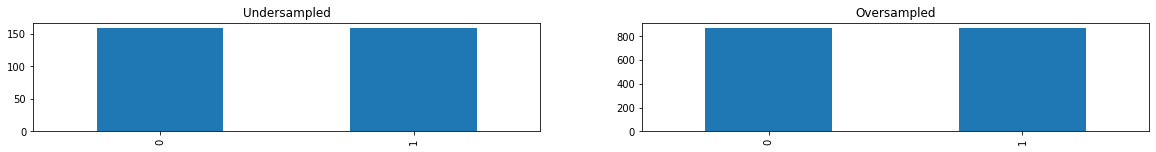

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(20,2))
y_train_under.value_counts().plot(kind="bar", ax=ax[0]).set_title('Undersampled')
y_train_over.value_counts().plot(kind="bar", ax=ax[1]).set_title('Oversampled')
plt.show()

## Final Sampled Class

In [25]:
print('Undersampled', Counter(y_train_under))
print('Oversampled', Counter(y_train_over))

Undersampled Counter({0: 159, 1: 159})
Oversampled Counter({0: 869, 1: 869})


## Benchmarking Models

In [26]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (classification_report,
                             confusion_matrix,
                             plot_confusion_matrix,
                             roc_curve, 
                             roc_auc_score)

In [27]:
LR = LogisticRegression(random_state = 6)
KNN = KNeighborsClassifier()
GNB = GaussianNB()
ET = ExtraTreesClassifier()
MLPC = MLPClassifier(activation='relu', solver='adam', learning_rate_init=0.01)

In [28]:
model_names = ['K-Nearest Neighbors', 
               'Logistic Regression', 
               'Gaussian Naive Bayes',
               'Extra Trees',
               'MLPC']
models = [KNN, LR, GNB, ET, MLPC]

## Functions for Cross Validation and Scoring

In [29]:
def cross_validate(names, models, _X_train, _y_train, index, cv=3):
  res = []
  for model in models:
    draft = model_selection.cross_val_score(model, _X_train, _y_train, cv=cv)
    res.append(draft)
  index = [index+' CV_' + str(i) for i in range(cv)]
  accuracy = pd.DataFrame(np.array(res).T, 
                          columns=names, 
                          index=index,
                          ).round(decimals=3)
  return accuracy

In [30]:
def get_score(names, models, _X_train, _y_train, _X_test, _y_test, index):
  res = {' ':[index]}
  for n, model in enumerate(models):
    trained = model.fit(_X_train, _y_train)
    score = trained.score(_X_test, _y_test)
    res[names[n]] = score
  df = pd.DataFrame(res).set_index(' ')
  return df

# No Dropped Feats

## Cross Validation (No Dropped Feats)

### Undersampled

In [31]:
accuracy_under = cross_validate(model_names, models, X_train_under, y_train_under, 'Full UnderSampled')
accuracy_under

,K-Nearest Neighbors,Logistic Regression,Gaussian Naive Bayes,Extra Trees,MLPC
Full UnderSampled CV_0,0.651,0.764,0.660,0.774,0.726
Full UnderSampled CV_1,0.557,0.670,0.632,0.708,0.670
Full UnderSampled CV_2,0.632,0.708,0.642,0.708,0.689


### Oversampled

In [32]:
accuracy_over = cross_validate(model_names, models, X_train_over, y_train_over, 'Full OverSampled')
accuracy_over

,K-Nearest Neighbors,Logistic Regression,Gaussian Naive Bayes,Extra Trees,MLPC
Full OverSampled CV_0,0.771,0.779,0.653,0.941,0.931
Full OverSampled CV_1,0.782,0.791,0.717,0.978,0.938
Full OverSampled CV_2,0.775,0.753,0.705,0.965,0.934


## Train and Test Scoring (No Dropped Feats)

### Undersampled

In [33]:
scores_under = get_score(model_names, models, X_train_under, y_train_under, X_test_under, y_test_under, 'Full Feat Scores UnderSampled')
scores_under

,K-Nearest Neighbors,Logistic Regression,Gaussian Naive Bayes,Extra Trees,MLPC
,,,,,
Full Feat Scores UnderSampled,0.686154,0.76,0.692308,0.772308,0.676923


### Oversampled

In [34]:
scores_over = get_score(model_names, models, X_train_over, y_train_over, X_test_over, y_test_over, 'Full Feat Scores OverSampled')
scores_over

,K-Nearest Neighbors,Logistic Regression,Gaussian Naive Bayes,Extra Trees,MLPC
,,,,,
Full Feat Scores OverSampled,0.634615,0.796154,0.653846,0.857692,0.853846


# With **PCA**

## Perform PCA

### UnderSampled PCA

In [35]:
from sklearn.decomposition import PCA

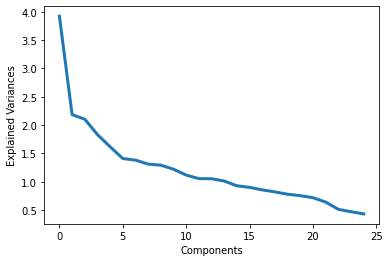

In [36]:
pca = PCA(n_components=25).fit(X_train_under, y=y_train_under)
PCA_X_under = pca.transform(X_train_under)
plt.plot(pca.explained_variance_, linewidth=3)
plt.xlabel('Components')
plt.ylabel('Explained Variances')
plt.show()

### Oversampled PCA

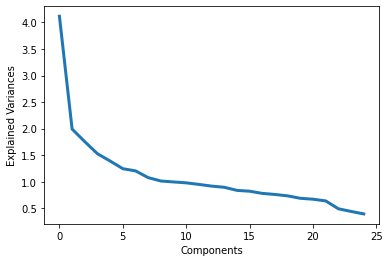

In [37]:
pca = PCA(n_components=25).fit(X_train_over, y=y_train_over)
PCA_X_over = pca.transform(X_train_over)
plt.plot(pca.explained_variance_, linewidth=3)
plt.xlabel('Components')
plt.ylabel('Explained Variances')
plt.show()

## Split Train, Test (PCA)

In [38]:
PCA_X_train_under, PCA_X_test_under, PCA_y_train_under, PCA_y_test_under = model_selection.train_test_split(PCA_X_under,
                                                                    y_train_under,
                                                                    test_size=0.25)
PCA_X_train_over, PCA_X_test_over, PCA_y_train_over, PCA_y_test_over = model_selection.train_test_split(PCA_X_over,
                                                                    y_train_over,
                                                                    test_size=0.25)
print('Undersampled:',PCA_X_train_under.shape)
print('Oversampled:',PCA_X_train_over.shape)
print("Number of features:",PCA_X_train_under.shape[1])

Undersampled: (238, 25)
Oversampled: (1303, 25)
Number of features: 25


## Cross Validation (PCA)

### Undersampled

In [39]:
PCA_under_acc = cross_validate(model_names, models, PCA_X_train_under, PCA_y_train_under, 'PCA Undersampled')
PCA_under_acc

,K-Nearest Neighbors,Logistic Regression,Gaussian Naive Bayes,Extra Trees,MLPC
PCA Undersampled CV_0,0.638,0.738,0.712,0.738,0.738
PCA Undersampled CV_1,0.633,0.709,0.684,0.633,0.646
PCA Undersampled CV_2,0.696,0.785,0.658,0.684,0.722


### Oversampled

In [40]:
PCA_over_acc = cross_validate(model_names, models, PCA_X_train_over, PCA_y_train_over, 'PCA Oversampled')
PCA_over_acc

,K-Nearest Neighbors,Logistic Regression,Gaussian Naive Bayes,Extra Trees,MLPC
PCA Oversampled CV_0,0.775,0.782,0.846,0.931,0.915
PCA Oversampled CV_1,0.753,0.800,0.823,0.952,0.917
PCA Oversampled CV_2,0.758,0.765,0.790,0.908,0.896


## Train and Test Scoring (PCA)

### Undersampled

In [41]:
PCA_under_scores = get_score(model_names, models, PCA_X_train_under, PCA_y_train_under, PCA_X_test_under, PCA_y_test_under, 'PCA Undersampled Scores')
PCA_under_scores

,K-Nearest Neighbors,Logistic Regression,Gaussian Naive Bayes,Extra Trees,MLPC
,,,,,
PCA Undersampled Scores,0.625,0.6875,0.65,0.7,0.6125


### Oversampled

In [42]:
PCA_over_scores = get_score(model_names, models, PCA_X_train_over, PCA_y_train_over, PCA_X_test_over, PCA_y_test_over, 'PCA Oversampled Scores')
PCA_over_scores

,K-Nearest Neighbors,Logistic Regression,Gaussian Naive Bayes,Extra Trees,MLPC
,,,,,
PCA Oversampled Scores,0.788506,0.772414,0.804598,0.956322,0.921839


# With **TSNE**

## Perform TSNE

In [43]:
from matplotlib.ticker import NullFormatter
from sklearn.manifold import TSNE

### Undersampled

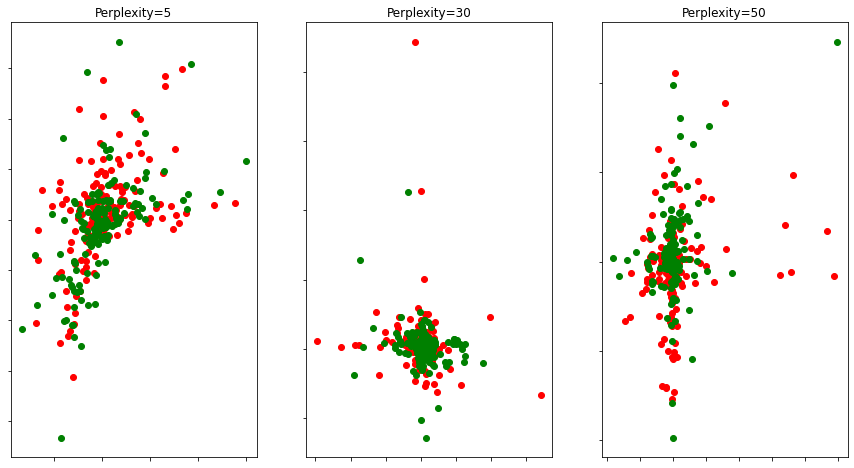

In [44]:
(fig, subplots) = plt.subplots(1, 3, figsize=(15, 8))
perplexities = [5, 30, 50]
n_components = 25

red = y_train_under == 0
green = y_train_under == 1

for i, perplexity in enumerate(perplexities):
    ax = subplots[i]

    tsne_X_under = TSNE(
        n_components=n_components,
        method='exact',
        init="random",
        random_state=0,
        perplexity=perplexity,
        learning_rate="auto",
        n_iter=300,
    ).fit_transform(X_train_under, y=y_train_under)
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(tsne_X_under[red, 0], tsne_X_under[red, 1], c="r")
    ax.scatter(tsne_X_under[green, 0], tsne_X_under[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

### Oversampled

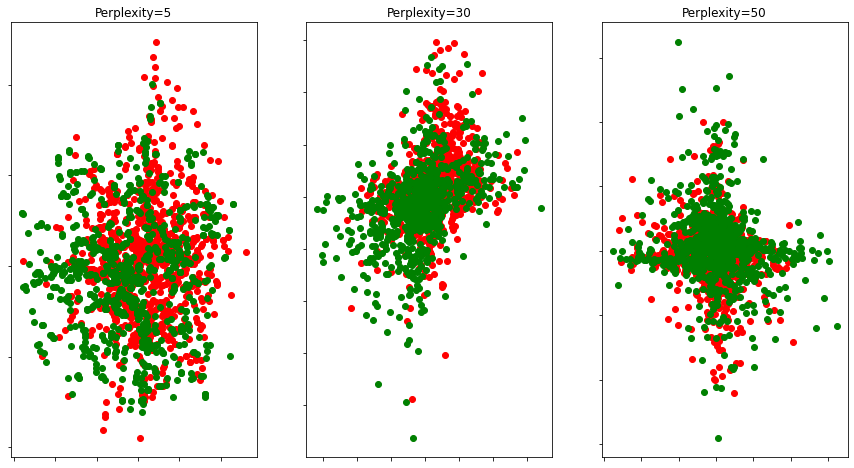

In [45]:
(fig, subplots) = plt.subplots(1, 3, figsize=(15, 8))
perplexities = [5, 30, 50]
n_components = 25

red = y_train_over == 0
green = y_train_over == 1

for i, perplexity in enumerate(perplexities):
    ax = subplots[i]

    tsne_X_over = TSNE(
        n_components=n_components,
        method='exact',
        init="random",
        random_state=0,
        perplexity=perplexity,
        learning_rate="auto",
        n_iter=300,
    ).fit_transform(X_train_over, y=y_train_over)
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(tsne_X_over[red, 0], tsne_X_over[red, 1], c="r")
    ax.scatter(tsne_X_over[green, 0], tsne_X_over[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

## Split Train, Test (TSNE)

In [46]:
tsne_under_X_train, tsne_under_X_test, tsne_under_y_train, tsne_under_y_test = \
                    model_selection.train_test_split(tsne_X_under,
                                                     y_train_under,
                                                     test_size=0.25)
tsne_over_X_train, tsne_over_X_test, tsne_over_y_train, tsne_over_y_test = \
                    model_selection.train_test_split(tsne_X_over,
                                                     y_train_over,
                                                     test_size=0.25)

print(tsne_under_X_train.shape)
print("Undersampled:", tsne_under_X_train.shape[1])
print(tsne_over_X_train.shape)
print("Oversampled:", tsne_under_X_train.shape[1])

(238, 25)
Undersampled: 25
(1303, 25)
Oversampled: 25


## Cross Validation (TSNE)

### Undersampled

In [47]:
TSNE_under_acc = cross_validate(model_names, 
                                     models, 
                                     tsne_under_X_train, 
                                     tsne_under_y_train, 'TSNE Undersampled')
TSNE_under_acc

,K-Nearest Neighbors,Logistic Regression,Gaussian Naive Bayes,Extra Trees,MLPC
TSNE Undersampled CV_0,0.588,0.612,0.550,0.575,0.588
TSNE Undersampled CV_1,0.519,0.532,0.544,0.557,0.519
TSNE Undersampled CV_2,0.519,0.620,0.671,0.646,0.532


### Oversampled

In [48]:
TSNE_over_acc = cross_validate(model_names, 
                                    models, 
                                    tsne_over_X_train, 
                                    tsne_over_y_train, 'TSNE Oversampled')
TSNE_over_acc

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


,K-Nearest Neighbors,Logistic Regression,Gaussian Naive Bayes,Extra Trees,MLPC
TSNE Oversampled CV_0,0.743,0.648,0.651,0.789,0.692
TSNE Oversampled CV_1,0.749,0.613,0.643,0.806,0.712
TSNE Oversampled CV_2,0.753,0.622,0.636,0.753,0.675


## Train and Test Scoring (TSNE)

### Undersampled

In [49]:
TSNE_under_scores = get_score(model_names, 
                              models,
                              tsne_under_X_train, 
                              tsne_under_y_train, 
                              tsne_under_X_test, 
                              tsne_under_y_test, 
                              'TSNE Undersampled Scores')
TSNE_under_scores

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


,K-Nearest Neighbors,Logistic Regression,Gaussian Naive Bayes,Extra Trees,MLPC
,,,,,
TSNE Undersampled Scores,0.6,0.6125,0.55,0.6375,0.5875


### Oversampled

In [50]:
TSNE_over_scores = get_score(model_names, 
                              models,
                              tsne_over_X_train, 
                              tsne_over_y_train, 
                              tsne_over_X_test, 
                              tsne_over_y_test, 
                              'TSNE Oversampled Scores')
TSNE_over_scores

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


,K-Nearest Neighbors,Logistic Regression,Gaussian Naive Bayes,Extra Trees,MLPC
,,,,,
TSNE Oversampled Scores,0.763218,0.673563,0.691954,0.811494,0.689655


# SUMMARY

## Cross Validation

### Undersampled

In [51]:
pd.concat([accuracy_under, PCA_under_acc, TSNE_under_acc])

,K-Nearest Neighbors,Logistic Regression,Gaussian Naive Bayes,Extra Trees,MLPC
Full UnderSampled CV_0,0.651,0.764,0.660,0.774,0.726
Full UnderSampled CV_1,0.557,0.670,0.632,0.708,0.670
Full UnderSampled CV_2,0.632,0.708,0.642,0.708,0.689
PCA Undersampled CV_0,0.638,0.738,0.712,0.738,0.738
PCA Undersampled CV_1,0.633,0.709,0.684,0.633,0.646
PCA Undersampled CV_2,0.696,0.785,0.658,0.684,0.722
TSNE Undersampled CV_0,0.588,0.612,0.550,0.575,0.588
TSNE Undersampled CV_1,0.519,0.532,0.544,0.557,0.519
TSNE Undersampled CV_2,0.519,0.620,0.671,0.646,0.532


### Oversampled

In [52]:
pd.concat([accuracy_over, PCA_over_acc, TSNE_over_acc])

,K-Nearest Neighbors,Logistic Regression,Gaussian Naive Bayes,Extra Trees,MLPC
Full OverSampled CV_0,0.771,0.779,0.653,0.941,0.931
Full OverSampled CV_1,0.782,0.791,0.717,0.978,0.938
Full OverSampled CV_2,0.775,0.753,0.705,0.965,0.934
PCA Oversampled CV_0,0.775,0.782,0.846,0.931,0.915
PCA Oversampled CV_1,0.753,0.800,0.823,0.952,0.917
PCA Oversampled CV_2,0.758,0.765,0.790,0.908,0.896
TSNE Oversampled CV_0,0.743,0.648,0.651,0.789,0.692
TSNE Oversampled CV_1,0.749,0.613,0.643,0.806,0.712
TSNE Oversampled CV_2,0.753,0.622,0.636,0.753,0.675


## Train, Test Scoring

### Undersampled

In [53]:
pd.concat([scores_under, PCA_under_scores, TSNE_under_scores])

,K-Nearest Neighbors,Logistic Regression,Gaussian Naive Bayes,Extra Trees,MLPC
,,,,,
Full Feat Scores UnderSampled,0.686154,0.7600,0.692308,0.772308,0.676923
PCA Undersampled Scores,0.625000,0.6875,0.650000,0.700000,0.612500
TSNE Undersampled Scores,0.600000,0.6125,0.550000,0.637500,0.587500


### Oversampled

In [54]:
pd.concat([scores_over, PCA_over_scores, TSNE_over_scores])

,K-Nearest Neighbors,Logistic Regression,Gaussian Naive Bayes,Extra Trees,MLPC
,,,,,
Full Feat Scores OverSampled,0.634615,0.796154,0.653846,0.857692,0.853846
PCA Oversampled Scores,0.788506,0.772414,0.804598,0.956322,0.921839
TSNE Oversampled Scores,0.763218,0.673563,0.691954,0.811494,0.689655


## Data to feed to future models



In [55]:
# full features
full_undersampled = (X_train_under, X_test_under, y_train_under, y_test_under)
full_oversampled = (X_train_over, X_test_over, y_train_over, y_test_over)

# PCA
PCA_undersampled = (PCA_X_train_under, PCA_X_test_under, PCA_y_train_under, PCA_y_test_under)
PCA_oversampled = (PCA_X_train_over, PCA_X_test_over, PCA_y_train_over, PCA_y_test_over)

# TSNE
TSNE_undersampled = (tsne_under_X_train, tsne_under_X_test, tsne_under_y_train, tsne_under_y_test)
TSNE_oversampled = (tsne_over_X_train, tsne_over_X_test, tsne_over_y_train, tsne_over_y_test)